# 2.0 Principal component analysis of vectors from recipe text

In [1]:
from game.utils import run_query
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import plotly.express as px
import nbformat
import plotly.graph_objects as go

from game.flaskapp_andrius.api import preprocesser
from game.src.feature_generator import get_embedding, get_vector_list, get_euc_dist_from_origin
from game.src.game_2_builder import get_scaled_pc_by_fg

In [2]:
# Takes the NEW recipe table with images updated
df_full_pca = pd.read_csv('../data/df_full_pca.csv')
df_full_pca.head(1)

,id,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,title,food_group,key_ingredient,image_url
0,1,0.173857,0.670006,-0.116477,0.130757,0.124489,-0.063687,-0.231062,-0.119998,-0.117414,...,-0.131298,0.046059,-0.014324,-0.084446,-0.006169,-0.192258,Seared beef with spring vegetable medley,Beef,Grass-fed heritage breed Yorkshire beef,https://mindfulchef-uat.imgix.net/recipes/1/2e...


# Visualizations

In [3]:
# Setting categorical variables as numbers for colour scale

# df_vector['food_group'] = df_clean['food_group']
# df_vector['key_ingredient'] = df_clean['key_ingredient']
# df_vector['cuisine'] = df_recipes['cuisine']

df_full_pca['fg_code'] = pd.factorize(df_full_pca['food_group'])[0]
print(pd.factorize(df_full_pca['food_group'])[1])

Index(['Beef', 'Chicken', 'Vegan', 'Pork', 'Fish', 'Lamb'], dtype='object')


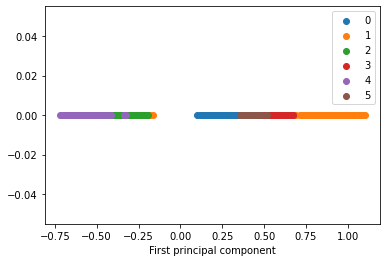

In [4]:
x_vals = np.array(df_full_pca['PC_1'])
y_vals = np.zeros(len(df_full_pca))
fg_group = np.array(df_full_pca['fg_code'])
fig, ax = plt.subplots()
for g in np.unique(fg_group):
    ix = np.where(fg_group == g)
    ax.scatter(x_vals[ix], y_vals[ix], label=g)
ax.legend()
plt.xlabel('First principal component')
plt.show()

# fg_dict = {0: 'Beef', 1: 'Chicken', 2: 'Vegan', 3: 'Pork', 4: 'Fish', 5: 'Lamb'}

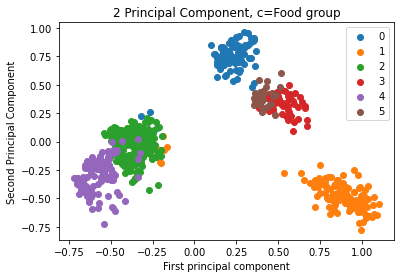

In [5]:
x_vals = np.array(df_full_pca['PC_1'])
y_vals = np.array(df_full_pca['PC_2'])
fg_group = np.array(df_full_pca['fg_code'])
fig, ax = plt.subplots()
for g in np.unique(fg_group):
    ix = np.where(fg_group == g)
    ax.scatter(x_vals[ix], y_vals[ix], label=g)
ax.legend()
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('2 Principal Component, c=Food group')
plt.show()

# fg_dict = {0: 'Beef', 1: 'Chicken', 2: 'Vegan', 3: 'Pork', 4: 'Fish', 5: 'Lamb'}

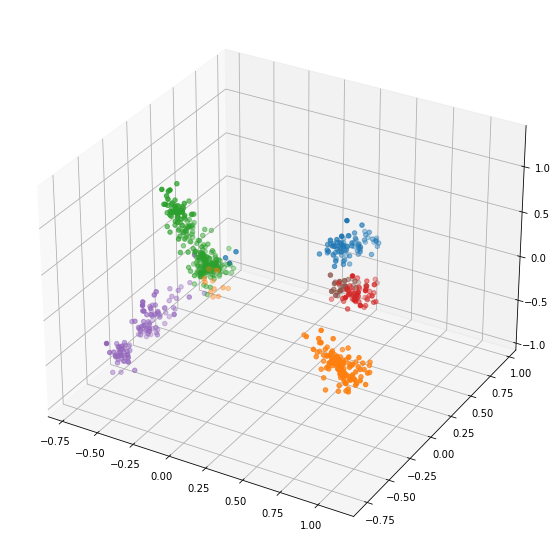

In [6]:
x_vals = np.array(df_full_pca['PC_1'])
y_vals = np.array(df_full_pca['PC_2'])
z_vals = np.array(df_full_pca['PC_3'])
fg_group = np.array(df_full_pca['fg_code'])
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')

for g in np.unique(fg_group):
    ix = np.where(fg_group == g)
    ax.scatter(x_vals[ix], y_vals[ix], z_vals[ix], label=g)
# ax.legend()
# plt.title('Recipes in food space. Colour = Food group')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')
plt.show()

# fg_dict = {0: 'Beef', 1: 'Chicken', 2: 'Vegan', 3: 'Pork', 4: 'Fish', 5: 'Lamb'}

In [7]:
fig = px.scatter_3d(df_full_pca, x='PC_1', y='PC_2', z='PC_3', color='food_group', text='id')
fig.update_traces(marker=dict(size=2.5))
fig.show()

In [8]:
fig = px.scatter_3d(df_full_pca, x='PC_1', y='PC_2', z='PC_3', color='food_group')
fig.update_traces(marker=dict(size=2))
fig.update_layout(scene = dict(xaxis_title='',yaxis_title='',zaxis_title=''))
"""
fig.update_layout(legend=dict(
    yanchor="bottom",
    y=0.3,
    xanchor="right",
    x=0.95
))
fig.update_layout(legend= {'itemsizing': 'constant'})
"""
fig.update_layout(scene = dict(
                    xaxis = dict(ticktext= [],tickvals= []),
                    yaxis = dict(ticktext= [],tickvals= []),
                    zaxis = dict(ticktext= [],tickvals= [])
                    ))

fig.show()

In [9]:
fig = px.scatter(df_full_pca, x='PC_1', y='PC_2', color='food_group')
fig.update_traces(marker=dict(size=3))
fig.show()

# TSNE

In [10]:
# X_tsne = TSNE(n_components=2).fit_transform(df_vector_sep)

In [11]:
'''
x_vals = np.array(X_tsne[:,0])
y_vals = np.array(X_tsne[:,1])
fg_group = np.array(df_final_pca['fg_code'])
fig, ax = plt.subplots()
for g in np.unique(fg_group):
    ix = np.where(fg_group == g)
    ax.scatter(x_vals[ix], y_vals[ix], label=g)
ax.legend()
plt.title('2D t-SNE, c=Food group')
plt.show()

# fg_dict = {-1: 'None', 0: 'Beef', 1: 'Chicken', 2: 'Vegan', 3: 'Pork', 4: 'Fish', 5: 'Shellfish', 6:'Lamb'}
'''

"\nx_vals = np.array(X_tsne[:,0])\ny_vals = np.array(X_tsne[:,1])\nfg_group = np.array(df_final_pca['fg_code'])\nfig, ax = plt.subplots()\nfor g in np.unique(fg_group):\n    ix = np.where(fg_group == g)\n    ax.scatter(x_vals[ix], y_vals[ix], label=g)\nax.legend()\nplt.title('2D t-SNE, c=Food group')\nplt.show()\n\n# fg_dict = {-1: 'None', 0: 'Beef', 1: 'Chicken', 2: 'Vegan', 3: 'Pork', 4: 'Fish', 5: 'Shellfish', 6:'Lamb'}\n"

In [12]:
# X3_tsne = TSNE(n_components=3).fit_transform(df_vector_sep)

In [13]:
'''
x_vals = np.array(X3_tsne[:,0])
y_vals = np.array(X3_tsne[:,1])
z_vals = np.array(X3_tsne[:,2])
fg_group = np.array(df_final_pca['fg_code'])
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')

for g in np.unique(fg_group):
    ix = np.where(fg_group == g)
    ax.scatter(x_vals[ix], y_vals[ix], z_vals[ix], label=g)
ax.legend()
plt.title('3D t-SNE, c=Food group')
plt.show()

# fg_dict = {-1: 'None', 0: 'Beef', 1: 'Chicken', 2: 'Vegan', 3: 'Pork', 4: 'Fish', 5: 'Shellfish', 6:'Lamb'}
'''

"\nx_vals = np.array(X3_tsne[:,0])\ny_vals = np.array(X3_tsne[:,1])\nz_vals = np.array(X3_tsne[:,2])\nfg_group = np.array(df_final_pca['fg_code'])\nfig = plt.figure(figsize=(15,10))\nax = plt.axes(projection='3d')\n\nfor g in np.unique(fg_group):\n    ix = np.where(fg_group == g)\n    ax.scatter(x_vals[ix], y_vals[ix], z_vals[ix], label=g)\nax.legend()\nplt.title('3D t-SNE, c=Food group')\nplt.show()\n\n# fg_dict = {-1: 'None', 0: 'Beef', 1: 'Chicken', 2: 'Vegan', 3: 'Pork', 4: 'Fish', 5: 'Shellfish', 6:'Lamb'}\n"